In [1]:
from fastai.vision import *

In [2]:
from fastai.utils.collect_env import *

In [12]:
def dice_loss(input, target):
#     pdb.set_trace()
    smooth = 1.
    input = input[:,1,None].sigmoid()
    iflat = input.contiguous().view(-1).float()
    tflat = target.view(-1).float()
    intersection = (iflat * tflat).sum()
    return (1 - ((2. * intersection + smooth) / ((iflat + tflat).sum() +smooth)))

def combo_loss(pred, targ):
    bce_loss = CrossEntropyFlat(axis=1)
    return bce_loss(pred,targ) + dice_loss(pred,targ)

class SegLabelListCustom(SegmentationLabelList):
    def open(self, fn): return open_mask(fn, div=True)
    
class SegItemListCustom(ImageImageList):
    _label_cls = SegLabelListCustom

In [13]:
learn = load_learner('')

In [32]:
open_image

<function fastai.vision.image.open_image>

In [33]:
img = open_image('./../Pretrained/Dyanamic UNet/data/images/vienna36_224_224_3139_2538_sw.png')

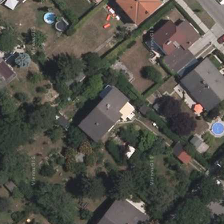

In [34]:
img

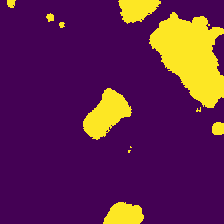

In [36]:
learn.predict(img)[0]